In [15]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.svm import LinearSVC
import sys
from urllib.request import urlopen
from sklearn import datasets, svm, metrics

In [16]:
def url2Image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [23]:
brg_img = url2Image('http://media.phapluatplus.vn/files/thanhhuyen/2016/04/04/12939421_258772247791487_1019266212_n-0714.jpg')

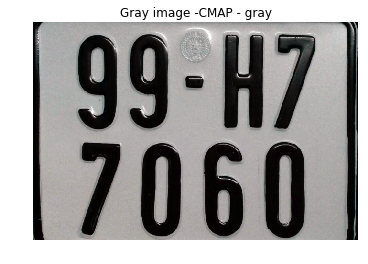

In [24]:
plt.axis('off')
plt.title('Gray image -CMAP - gray')
plt.imshow(brg_img, cmap = plt.get_cmap('gray'))
plt.show()


In [30]:
#convert to grayscale and apply gausian filtering
gray_img = cv2.cvtColor(brg_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(brg_img,(5,5),0)

In [35]:
#threshold the image
ret, th_img = cv2.threshold(gray_img,90,255,cv2.THRESH_BINARY_INV)

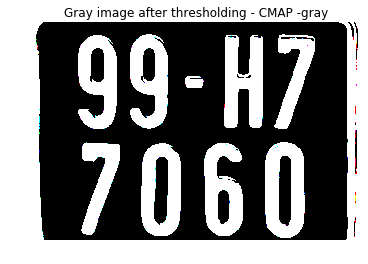

In [47]:
plt.axis('off')
plt.title('Gray image after thresholding - CMAP -gray')
plt.imshow(th_img, cmap= plt.get_cmap('gray'))
plt.show()

In [64]:
temp_img, ctrs, hier = cv2.findContours(th_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

error: C:\ci\opencv_1512688052760\work\modules\imgproc\src\contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl


In [ ]:
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [ ]:
for rect in rects:
    x,y,w,h = rect
    cv2.rectangle(brg_img,(x,y),(x+w,y+h),(0,255,0))

In [ ]:
plt.axis('off')
plt.title('Detection result')
plt.imshow(cv2.cvtColor(brg_img,cv2.COLOR_BGR2RGB))
plt.show()
